# Week 2: Root Finders and Integration

## Place All Library Imports in This Section

In [2]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import random

## The Basic Bisection Routine

### Bisection Module

<font color = blue>
Write your bisection routine as a function.  It should take, as inputs, a function "F" (the function whose roots we are interested in), an initial bracketing, (that is, a pair $x_{\ell}$ and $x_r$), and a tolerance $\epsilon$ that specifies how close to zero the function should be before the module exits.

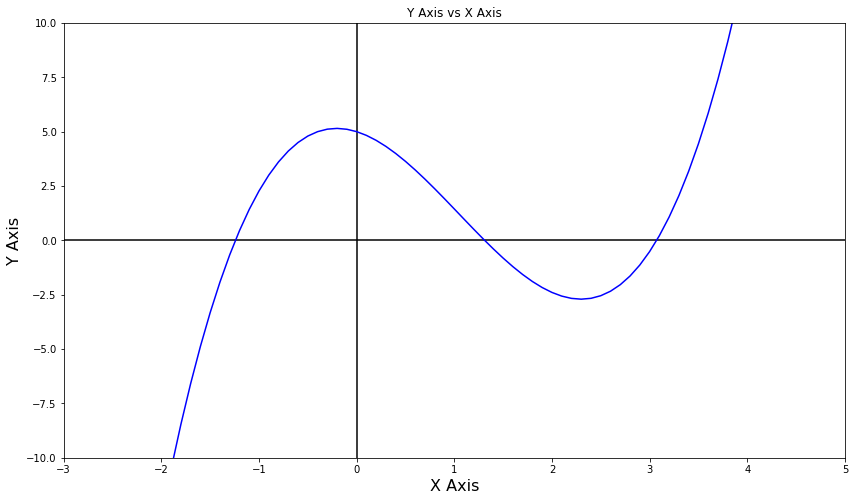

-1.5 1.5 3.0


In [67]:
def bisect(Function,points,tolerance):
    #seperating left, right, and calculating middle and p points for ease of use
    XR=float(points[1])
    XL=float(points[0])
    XM=(XR+XL)/2.0
    while abs(Function(XM))>tolerance:
        XM=(XR+XL)/2.0
        #print(XM)
        p=Function(XM) * Function(XL)
        now=Function(XM)
        #if within the tolerance, then return the x value, the accuracy is enough
        if now <= tolerance:
            return(XM)
            break
        #when the middle point is on the left, reset points and try again
        elif p > 0:
            XL=XM
        #when the middle point is on the right, reset points and try again 
        else:
            XR=XM
        
        
def simpleFunction(x):
    return x**3 - math.pi*x**2 - math.sqrt(2)*x + 5


def plotThisFunctionPleaseAndThankYou(function,largeXRange,largeYRange,y=0,x=0):
    #get the data to plot
    func=np.vectorize(function)
    xValues=np.array(np.arange(largeXRange[0],largeXRange[1],0.1))
    yValues=np.array(func(xValues))
    
    #plot it
    fig, ax = plt.subplots(1,1,figsize=(14, 8))
    param_dict1={'color' : 'blue', 'linestyle' : 'solid'}
    axis_font = {'size':16}
    ax.plot(xValues,yValues,**param_dict1)
    #label lines
    ax.set_xlabel("X Axis",**axis_font)
    ax.set_ylabel("Y Axis",**axis_font)
    #ax.legend(["","a inf."],loc='lower right')
    #set limits and show axiis
    plt.ylim(largeYRange[0], largeYRange[1])
    plt.xlim(largeXRange[0], largeXRange[1])
    
    plt.vlines(x,largeYRange[0], largeYRange[1], colors='k', linestyles='solid')
    plt.hlines(y,largeXRange[0], largeXRange[1], colors='k', linestyles='solid')
    
    #plot title, y vs x.
    plt.title("{} vs {}".format("Y Axis","X Axis"),fontdict=None,loc='center')

    plt.show()
    
plotThisFunctionPleaseAndThankYou(simpleFunction,(-3,5),(-10,10))

print(bisect(simpleFunction,(-2,-1),0.001),bisect(simpleFunction,(1,2),0.001),bisect(simpleFunction,(2,4),0.001))

### Simple Test

<font color = blue>
Test your code on the simple function

$$
f(x) = x^3 - \pi x^2 - \sqrt{2} x + 5
$$

Remember to plot it first, so that you know how to start your initial bracketing.  Find all three roots, using $\epsilon = 10^{-8}$.

It looked like there were points loce to -1.5, 1.5, and 3, so I input the ranges $(-2,-1), (1,2), (2,4)$ and confirmed that teh seros of this function were just what I guessed.

I remember being taught in middle school on calculators that some graphing calculators at the time had a root finding function, where it would graph the function and we would choose two points on either side of it. This must be the algorithm that they used.

## The Range Finder

<font color = blue>
In class we showed that the (dimensionless) range of a projectile $r(u, \theta_0)$ would satisfy the equation

$$
0 = \frac{ur(u\sin\theta_0 + 1)}{\cos\theta_0} + \ln\left[1 - \frac{ur}{\cos\theta_0}\right]
$$

where $\theta_0$ is the initial angle and $u$ is the ratio of initial speed to terminal velocity.

neat

### Part 1: A Specific Angle and u-value

<font color = blue>
Find the value of the range $r$ for the angle $\theta_0 = \frac{\pi}{6}$ and the velocity $u = 0.01$.  Remember to plot the function you are trying to root-find first, so that you know how to start your initial bracketing.  How does your result compare with what you would get in the drag-free case for the same initial angle?  Does this make sense?

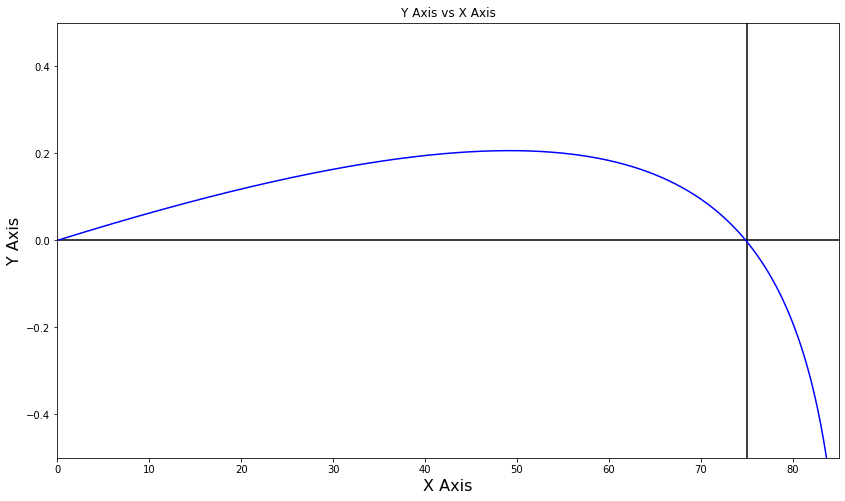

75.0 0.08830956425550274


In [69]:
def dimensionlessRange(r):
    theta=math.pi/6
    u=0.01
    return (u*r*(u*math.sin(theta)+1))/math.cos(theta) + math.log10( 1- ((r*u)/math.cos(theta)) )

 
plotThisFunctionPleaseAndThankYou(dimensionlessRange,(0,85),(-0.5,0.5),0,75)

print( bisect(dimensionlessRange,(60,80),10**(-6)), math.sin(math.pi/3)/9.8067)

The bisect function detected a zero point at r=75. Compared to the drag free case, this root shoudl be much lower in magnitude because it has drag slowing it down, the value of r being a parabolic curve, fully symmetrical due to no forces slowing it down. 

I don't think this plot looks correct, because the non-dimentionalized valu of r is equal to $\frac{R}{Rmax}$, meaning that for it to be greater than 1, namely 75, the range would have to be larger than the maximum range. Hmm.

## Part 2: A Function of u and initial angle

<font color = blue>
Write a function that takes as inputs $\theta_0$ and $u$, and returns the range $r$.  

The hardest part of this is working out how to find the "initial bracketing".  Especially tricky is that the function you are root finding on is not well defined for all values of $r$: first you need to establish where the function "fails" and make sure that your bracketing avoids this.

In [96]:
def dimensionlessRangeOutput(theta,u):
    return (u*r*(u*math.sin(theta)+1))/math.cos(theta) + math.log10( 1- ((r*u)/math.cos(theta)) )

def returnRange(theta,u):
    print( bisect(dimensionlessRange,(70,80),10**(-6)) , theta,u)
    

    
returnRange()

TypeError: returnRange() missing 2 required positional arguments: 'theta' and 'u'

### * Part 3: Graphs

<font color = blue>
Use this function to make a single plot showing four curves: $r(\theta_0)$ vs. $\theta_0$ for $u = 0.5, 1.0, 2.0, 4.0$.  Let $\theta_0$ range from $0.01$ to $\frac{\pi}{2} - 0.01$ (as the endpoints are tricky).  Remember to label your plot thoroughly (including a legend), and discuss the results physically.

## The Basic Integration Functions

### Box Integration

<font color = blue>
Write a function that implements the box approximation method.  Your function should take, as input, a function F, the lower and upper integration limits $x_0$ and $x_f$. and the number of rectangles to be used in the approximation $N$.  It should return the result of the approximation.

In [3]:
def letsGetBoxy(funct,limits,N):
    #set the change of x
    dX = ( limits[1]-limits[0] ) / N
    #make an array of x values and y values, then return the sum of (Xf-Xo)*delta x
    xVals = np.array([ limits[0]+(dX*i) for i in range(N)])
    yVals = np.array([funct(x) for x in xVals])
    return sum( np.array( [dX*(yVals[n]) for n in range(N)] ) )


### Trapezoid Integration

<font color = blue>
Write a second function that does the same thing, but uses the trapezoidal method.

In [4]:
def inatelyTrapazoidal(funct,limits,N):
    dX = ( limits[1]-limits[0] ) / N
    return letsGetBoxy(funct,limits,N) + 0.5*dX*( funct(limits[1])-funct(limits[0]) ) 

### Testing, testing

<font color = blue>
Test both of your pieces of code on the function

$$
f(x) = \frac{x^2}{2}
$$

with the limits of integration $[-1, 3]$ and $N = 100$.  Also work out the integral analytically (show your work below), and compare the results.

In [32]:
def xSquaredOverTwo(x):
    return x**2/2

print( letsGetBoxy(xSquaredOverTwo,(-1,3),100), inatelyTrapazoidal(xSquaredOverTwo,(-1,3),100) )

4.587200000000002 4.667200000000002


On pen and paper, F(x) over [-1,3] equals x^3/6 evaluated from -1 to 3, producing 14/3, 4.666. From the Boxy method, the answer is accurate up to the first digit, whereas with the same, relatively small amount of sections(N=100), the corrected trapazoidal function produces an answer accurate thorugh the first 3 digits. Neat- also thanks for catching my off by one error, I'm all left today.

## Gaussian Integration

<font color = blue>
We now want to use out numerical integration method to approximate the Gaussian integral

$$
\int_{-\infty}^{\infty} e^{-x^2} \, dx
$$

which has the known analytic value $\sqrt{\pi}$.  Here there is an additional challenge, becuase we can't expect to use $\pm\infty$ as inputs for our numerical work.

In [41]:
def gussian(x):
    return math.exp(-x**2)

#print the actual value
print(math.sqrt(math.pi))

#print the approximation within an anzatz of a range for 100 sections
print( inatelyTrapazoidal(gussian,(-4,4),100) )

1.7724538509055159
1.7724538226247342


I know that the gaussian function goes to zero at large and small values of x, so I just used a fairly wide range until the answer stopped changing. I left is as +/- 4, because it goes to zero quite quickly. I could get some more sig figs if I upped the limit magnitudes, but this shows more visually how much accuracy is achived: accurate up through the first 8 digits, where accuracy can be through all visible digits if I change the range, the trapazoidal integral integration twchnique showing no dicernable difference with the shown sig figs. I did this before looking at what follows, lets see how it compares to a better aproach.

### Plotting the Function

<font color = blue>
Begin by plotting the function $e^{-x^2}$.  This becomes approximately zero, far enough from $x = 0$.  Use the plot to appropriately choose limits of integration to use in the numerical work.

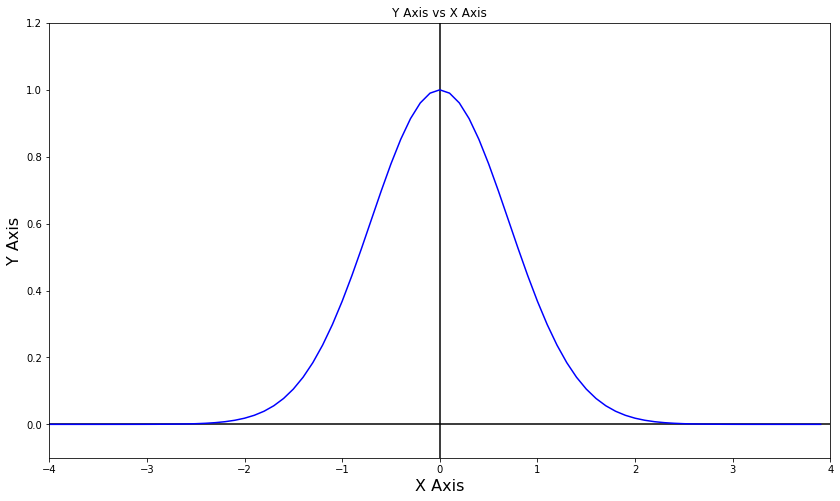

In [40]:
plotThisFunctionPleaseAndThankYou(gussian,(-4,4),(-0.1,1.2))

### Evaluating the Integral

<font color = blue>
Using these limits, evaluate the Gaussian integral with your trapezoidal approximation function, and compare the result with the analytic value

See the above, not very far off, I could probably have done it with +/-3

### Sources of Error

<font color = blue>
The evaluation you have done actually has two sources of error: the error associated with approximating an integral as a series of trapezoidal areas, and the error associated with cutting off the region of integration.  It's instructive to know how much each is contributing to the error, and which is most significant.  (This will, of course, depend on your choices of $N$ and the region of integration.)

Compute the approximation of the integral for some value of $N$, and then again for twice that value.  This decreasees the width of each trapezoid by $\frac{1}{2}$, and should make the approximation matter.  Calculate the difference between the two results.

Then compare the result you had for your first value of $N$ with a result where you double the total size of your region of integration.  You should also double your value of $N$, so that the width of each trapezoid is unchanged.  Calculate the difference between the original result and this result.

Finally, comment on which is your dominant source of error.

In [44]:
actual=math.sqrt(math.pi)
hundred=inatelyTrapazoidal(gussian,(-4,4),100)
tundred=inatelyTrapazoidal(gussian,(-4,4),200)
hatundred=inatelyTrapazoidal(gussian,(-6,6),200)

#prints the actual and initial calculation, and their difference
print(actual,hundred,actual-hundred)

#print, in order; initially calculated value, twice the resolution, its difference from the actual, 
#the same resolution for double the range, and its difference from the actual value.
print( hundred,tundred,actual-tundred,hatundred,actual-hatundred)

1.7724538509055159 1.7724538226247342 2.828078171646098e-08
1.7724538226247342 1.7724538233394334 2.7566082527741287e-08 1.772453850905517 -1.1102230246251565e-15


This seems to indicate that the range has more importance at these values than the resolution of the approximation, whereas then I would increase the range dramatically and see when the resolution starts to become the main source of error. This would mean during calculations that a courser resolution can be used to approximate the integral so that computation time is not wasted on gigantic functions.  

## The Sinc Function

<font color = blue>
Now we want to work at approximating the integral

$$
\mathcal{I} = \int_{0}^{10} \frac{\sin x}{x} \, dx
$$

Although the integrand is actually finite for all values of $x$, a computer is going it have trouble evaluating it at $x = 0$.  Find a way to work around this difficulty that does not introduce additional sources of error into your code.  Evaluate the integral using $N = 100$.

In [70]:
def kitchenSinc(x):
    return (math.sin(x)/x)

def massageSinc(x):
    return x*math.sin(x)/x**2

#first the way that incorporates a new source of error, then fearlessly jumping into oblivion.
#massage=inatelyTrapazoidal(kitchenSinc,(0.1,10),100)
#second=( math.sin(10)*math.log10(10) ) - ( math.sin(0)*math.log10(0) )  
print( inatelyTrapazoidal(kitchenSinc,(0.0000001,10),100), inatelyTrapazoidal(massageSinc,(0.0000001,10),100))


1.6582820963952123 1.6582820963952123


I did two ways, the way you wanted and the faster way that was mentioned in class; masaging the function so that the limit at zero is not longer an infinitely large problem, and measuring very closely to zero so that the difference is negligable.

Massaging it required integration by parts (when in doubt), using $du=\frac{1}{x}dx$, $u=ln(x)$ and $v=Sin(x)$, $dv=Cos(x)dx$, bringing $$ \int_0^{10} \frac{Sin(x)}{x} dx  =  Sin(x)ln(x)\bigg|_0^{10} + \int_0^{10} ln(x)Sin(x)  dx$$, where $ln(0)=$undefigned and there are infinite discontinuities. oops.

I instead cheated just a little by adding an x to the numerator and denominator, producing the same function, but also ensuring that at 0, the function does not explode. I'll some discuss with you if that's inappropriate, but it works out in terms of the integral- very little difference from the other method, in fact there aren't enough significant figures to be able to see the difference.

## The Period of the Pendulum

### Creating the Function

<font color = blue>
In class we showed that the (dimensionless) period of the pendulum as a function of initial angle $\theta_0$ would be

$$
\tau(\theta_0) = \frac{2}{\pi}\int_{0}^{\pi/2} \frac{1}{\sqrt{1 - \sin^2\frac{\theta_0}{2}\sin^2\phi}} \, d\phi
$$

Create a module that will find the (dimensionless) period of the pendulum.  Check its output by evaluating it at $\theta_0 = 0.1$.  Does the result make sense?  (Hint: what would the "small angle" approximation tell you?)

In [90]:
def actualPeriod(phi):
    theta=0.1
    return (2/math.pi)*(1/math.sqrt(1-(math.sin(theta/2)*math.sin(phi))**2))

#if dependant upon release angle
print(inatelyTrapazoidal(actualPeriod,(0,math.pi/2),100))

#small angle approximation
def smallPeriod(phi):
    theta=0.1
    return (2/math.pi)*(1/math.sqrt(1-(theta/2*phi)**2))

print(inatelyTrapazoidal(smallPeriod,(0,math.pi/2),100))

1.0006253583077367
1.0010309999797524


Using the small angle approciamtion to guess at sin(small x) as equal to x, the value attained for the period is fairly similar. I tried at larger values of theta, but the difference grew rapidly due to the approxiamtion falling apart.

### * Plotting the Period

<font color = blue>
Make a plot of $\tau$ as a function of $\theta_0$ over the range $[0, \pi - .01]$.  Add to the plot a horizontal line at $\tau = 1$ and a vertical line at $\theta_0 = \pi$, to make the plot easier to read.  Discuss the result thoroughly!
<font color = black>
    did you mean $\pi/2$? in the range $[0, \pi - .01]$, a vertical line at $\pi$ would not be visable.

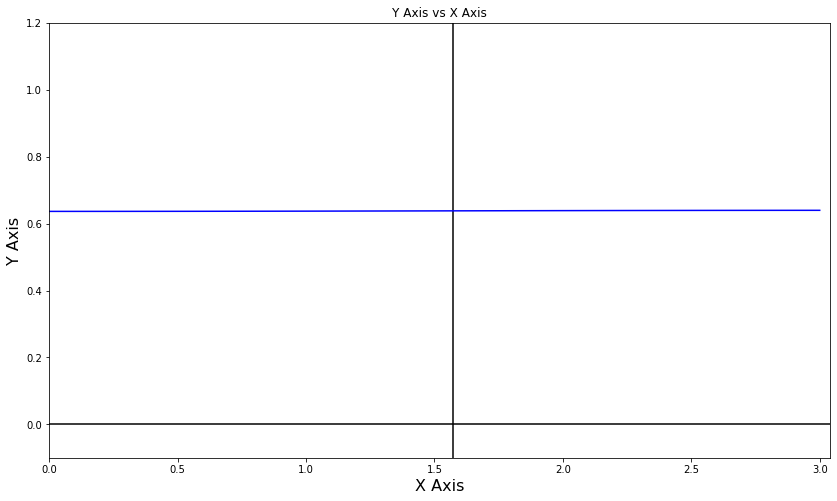

In [92]:

def thetaPeriod(theta):
    phi=0.1
    return (2/math.pi)*(1/math.sqrt(1-(math.sin(theta/2)*math.sin(phi))**2))


plotThisFunctionPleaseAndThankYou(thetaPeriod,(0,math.pi-0.1),(-0.1,1.2),0,math.pi/2)

Thist plot shows that this rance of starting angles have the same period, even at the dreaded pi/2, where the funciton is supposed to whot the pendulum at perfectly vertical. I've checked my function a few times, but it I  may have missed something. I'll stop by for office hours sometime this week to both go over this and talk about unicycling.

# Any Other Problem

<font color = blue>
Find a physical problem different from the ones discussed above that requires either a numerical root finder or numerical integration to complete.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

I would do finite square well, but thats jsut picking an initial few system conditions, plotting to see where the root finder needs to be used, and going at it. I'd guess I could subtract the sides of the trancendental equation from eachother and find when they equal zero.

But, I'll be doing something a little differrent, really another place that the small angle formula is used is the double slit interferance experiment. When monochromatic light is shined though two slits close together and the effect is noted on an opposite wall (where the spacing of the slits is small compared to the distance of the opposite wall), then light interferance can be noted fairly easily. Because of the relative sizes of the slit and opposite wall geometry in the system, often the small angle approximation is used. it simplifies the equations relating lift intensity a tthe nodes from $$ m\lambda = a sin(\theta)  \; \; \; \& \; \; \;  I = I_o \Bigg[ \frac{sin \big( \frac{\pi a sin(\theta)}{\lambda} \big) }{\frac{\pi a sin(\theta)}{\lambda}} \Bigg]^2 $$  

into the problem of $$ m \lambda = a\frac{y}{L} \; \; \; \& \; \; \; I = I_o \Bigg[  \frac{sin(\frac{\pi a y}{\lambda L})}{\frac{\pi a y}{\lambda L}}   \Bigg]$$ I'm not sure how large the difference will be, but this is a perfect time to show how good an approximation this really is. \\ What I want to do with a root finder is see where the intensity drops below what is visable, estimating an intensity ratio of $\frac{I}{I_o}$ of 0.05 would mark the end of a node. 

In [ ]:
def actualIntensityRatio(theta):
    a=0.001 #slit width in meters
    L=2 #meters
    llamdba=0.000000900 #in meters, wavelength of light being diffracted
    return ( math.sin(math.pi*a*sin(theta)/(llambda)) / (math.pi*a*math.sin(theta)/llambda) )**2 -0.05


def approxIntensityRatio(theta):
    a=0.001 #slit width in meters
    L=2 #meters
    llamdba=0.000000900 #in meters, wavelength of light being diffracted
    return ( math.sin(math.pi*a)/(llambda*L)) / (math.pi*a/llambda*L) )**2 -0.05

#(unfinished)